In [44]:
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='FlowerType')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
n_components = 3
pca_iris = PCA(n_components=n_components).fit(iris.data)
print(pca_iris)
print(pca_iris.explained_variance_ratio_)
print(pca_iris.components_)
X_pca = pca_iris.transform(iris.data)

X_pca.shape

PCA(n_components=3)
[0.92461872 0.05306648 0.01710261]
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]]


(150, 3)

In [46]:
def calc_loss(variances, i):
    n = len(variances)
    numerator = np.sum(variances[n-i:n])
    denominator = np.sum(variances)

    return numerator / denominator if denominator != 0 else 0

In [47]:
variances = pca_iris.explained_variance_ratio_

for i in range(1, n_components):
    result = calc_loss(variances, i)
    print(f"Calc loss after removing {i} columns: {result*100:.2f} %")

Calc loss after removing 1 columns: 1.72 %
Calc loss after removing 2 columns: 7.05 %


In [48]:
X_pca_np = np.array(X_pca)
X_pca_np = np.delete(X_pca_np, 2, axis=1)
X_pca_np.shape

(150, 2)

C:\Users\julia_rxokckg\AppData\Local\Temp\ipykernel_22748\1359112183.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_classes))


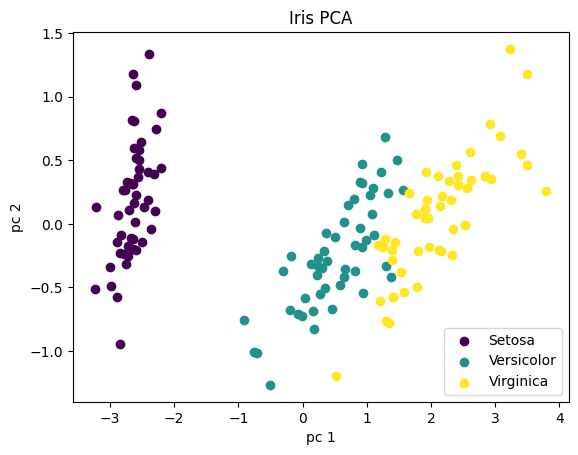

In [50]:
import matplotlib.pyplot as plt
import numpy as np

x_values = [row[0] for row in X_pca_np]
y_values = [row[1] for row in X_pca_np]

unique_classes = np.unique(y)
labels = ['Setosa', 'Versicolor', 'Virginica']
colors = plt.cm.get_cmap('viridis', len(unique_classes))

for i, class_label in enumerate(unique_classes):
    plt.scatter(
        np.array(x_values)[np.array(y) == class_label],
        np.array(y_values)[np.array(y) == class_label],
        color=colors(i),
        marker='o',
        label=f'{labels[i]}'
    )

plt.xlabel("pc 1")
plt.ylabel("pc 2")
plt.title("Iris PCA")
plt.legend()
plt.show()